In [1]:
"""This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state."""



'This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.\n\nDescription of fnlwgt (final weight)\nThe weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:\n\nA single cell estimate of the population 16+ for each state.\n\nControls for Hispanic Origin by age and sex.\n\nControls by Race, age and sex.\n\nWe use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers t

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [8]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
#Ensuring that in future observation we don't have any truncated information being displayed in our jupter notebook.


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [10]:
#using the infor method we can see that there are 6 columns with integer datatype and 9 columns that have object data type.we willtry to separate these columns for easier analysis purpose.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
#we have successful bifurcated the object datatype columns and integer data type columns name.since we don't have to worry about outliers and skewness in categorical columns we can use this separate column names to pre process only on numerical continuos columns.




object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        object_datatype.append(x)
        print(f"object data type columns are:",object_datatype)
        
        integer_datatype=[]
        for x in df.dtypes.index:
            if df.dtypes[x]=='int64':
                integer_datatype.append(x)
                print(f"\ninteger data type columns are:",integer_datatype)

object data type columns are: ['Workclass']

integer data type columns are: ['Age']

integer data type columns are: ['Age', 'Fnlwgt']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
object data type columns are: ['Workclass', 'Education']

integer data type columns are: ['Age']

integer data type columns are: ['Age', 'Fnlwgt']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss']

integer data type columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hour

In [13]:
#using the describe method we can take a look at the numerical data type columns and observe the distribution of integer data amongest them.


df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [14]:
#it looks like we do not have any missing data present in our dataset for any of the columns.

df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

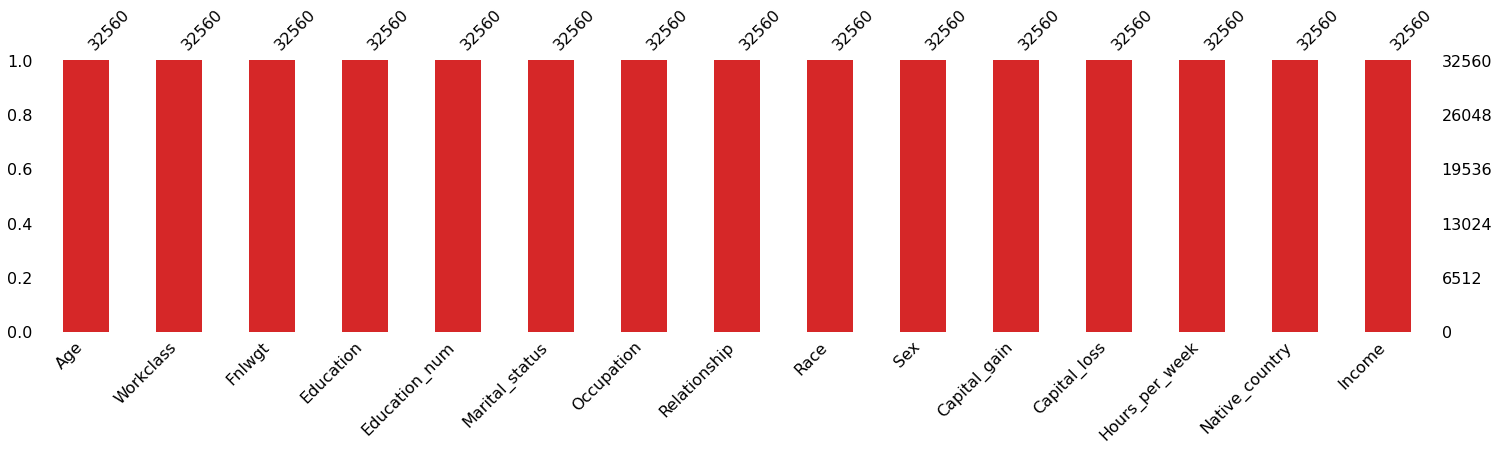

In [15]:
#we are able to depict the missing values information in a bar plot format where we can clearly see that all the rows filled with data there are no null values present.


missingno.bar(df,figsize=(25,5),color="tab:red")

In [16]:
#drop
print(f"Rows and Columns before dropping duplicates:",df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates:",df.shape)

Rows and Columns before dropping duplicates: (32560, 15)
Rows and Columns after dropping duplicates: (32536, 15)


In [17]:
#The nunique method lists down the number of all the unique data present in each column of our dataset.
df.nunique().to_frame("Unique Values")

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [18]:
#In the below cell we are taking a look at all the unique values of object data type column.
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

In [19]:
#We have successfully replace all the data.
df['Workclass'].replace({'?':'Other_Working_Class'},inplace=True)
df['Occupation'].replace({'?':'Other_Occupation'},inplace=True)
df['Native_country'].replace({'?':'others'},inplace=True)

In [20]:
#listing out the columns names.
print(f"okbject data type columns names:",object_datatype)
print(f"\nInteger data type columns names:",integer_datatype)

okbject data type columns names: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Integer data type columns names: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


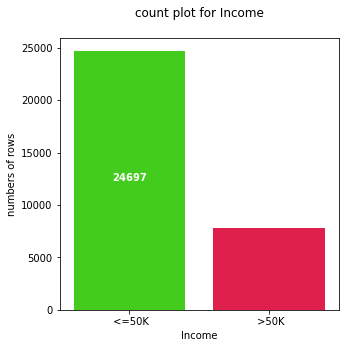

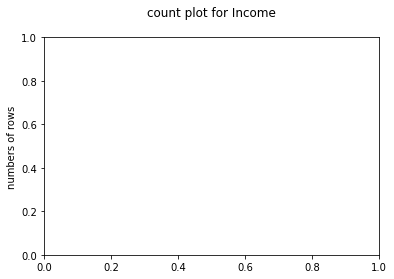

In [21]:
#From the below count plot we can see that our target label "income" column has imbalanced dataset that will need to be taken care of before we start building classification machine learning model.
try:
    plt.figure(figsize=(5,5))
    col_name='Income'
    values=df [col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index +=1
        plt.title(f"count plot for {col_name}\n")
        plt.ylabel(f"numbers of rows")
        plt.show()
        
except Exception as e:
        print("Error",e)
        pass

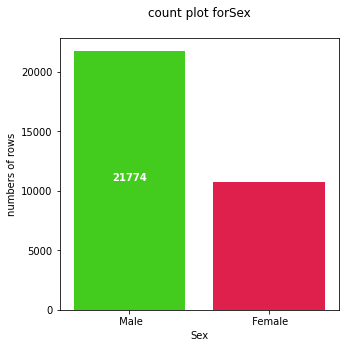

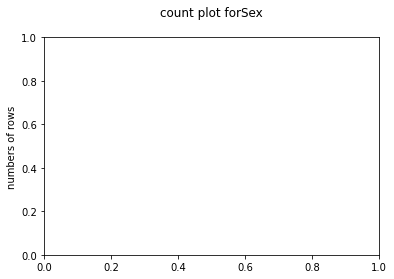

In [22]:
#From the below count plot we can see that the number of data values for male is higher than that of its female counterparts.
try:
    plt.figure(figsize=(5,5))
    col_name='Sex'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name],palette="prism")
    index=0
    ax=sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index +=1
        plt.title(f"count plot for{col_name}\n")
        plt.ylabel(f"numbers of rows")
        plt.show()
        
except Exception as e:
            print("Error:",e)
            pass

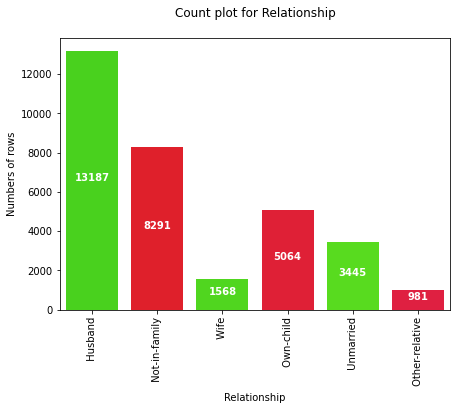

In [23]:
#From the below count plot we can see that the relationship status the values for husband is the highest and other realtive has the lowest data.
try:
    plt.figure(figsize=(7,5))
    col_name = 'Relationship'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

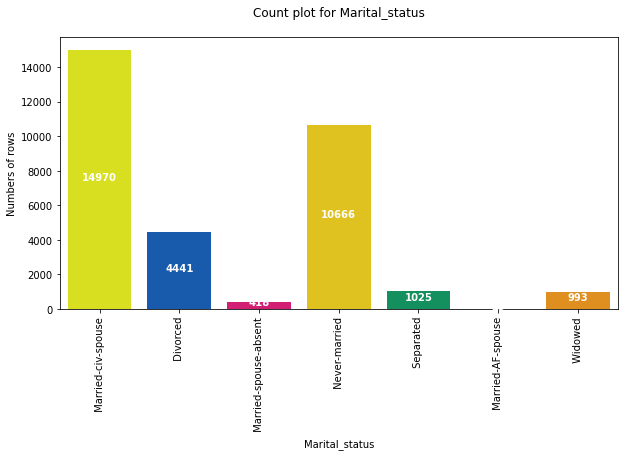

In [24]:
#From the below count plot we can see that the marital status column has married spouse and never married people on the higher edge as compared to the other values.
try:
    plt.figure(figsize=(10,5))
    col_name = 'Marital_status'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

Error: 'Text' object has no property 'fontwight'


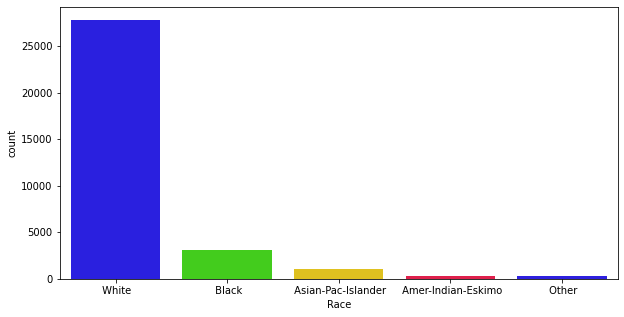

In [25]:
#From the below count plot we can see that the Race column mostly comprises of white people in the dataset.
try:
    plt.figure(figsize=(10,5))
    col_name = 'Race'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontwight='bold',color='w')
        index +=1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

Error: 'Text' object has no property 'horizontalalignmenr'


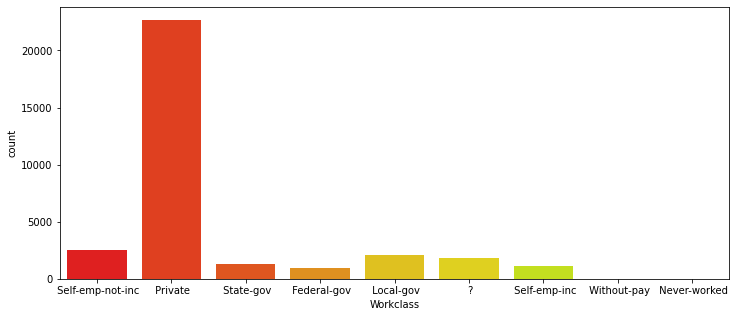

In [26]:
#From the below count plot we can see that the workclass column the highest number of people work for private sector and the other work classes or people who are unemployed is quite less to negligible.
try:
    plt.figure(figsize=(12,5))
    col_name = 'Workclass'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignmen="center",fontweight='bold',color='w')
        index +=1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

Error: name 'col_names' is not defined


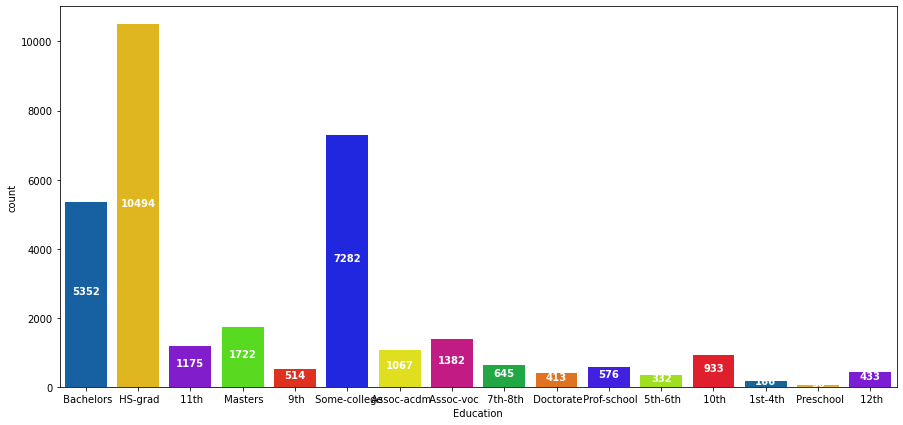

In [27]:
#From the below countplot we can see that education column has the highest numbers of values in HS grad followed by some college and bachelors.
try:
    plt.figure(figsize=(15,7))
    col_name = 'Education'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_names}\n")
    plt.ylabel(f"Numbers of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

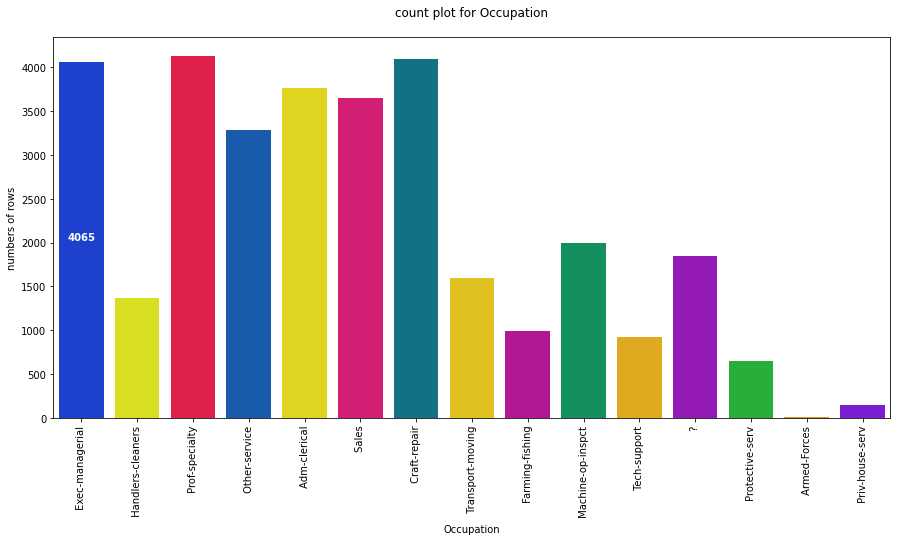

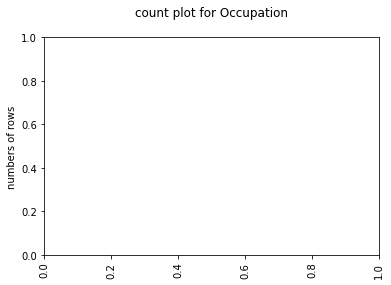

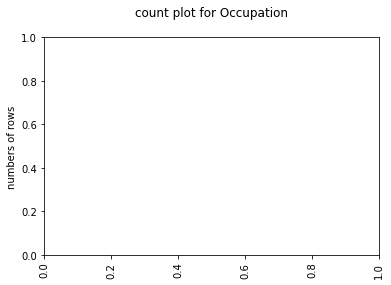

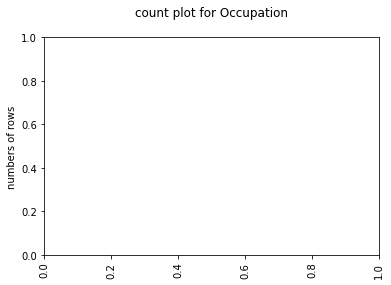

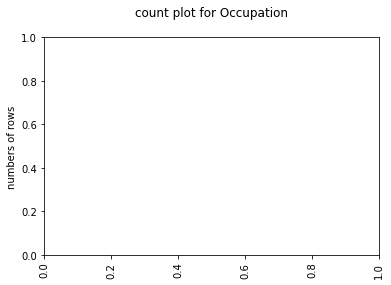

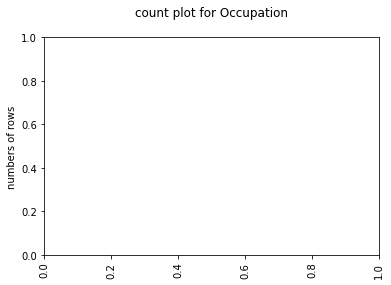

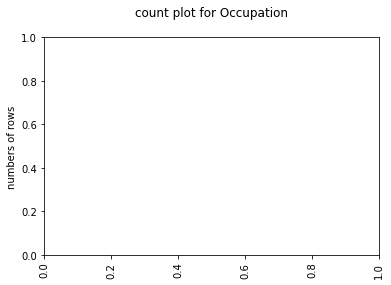

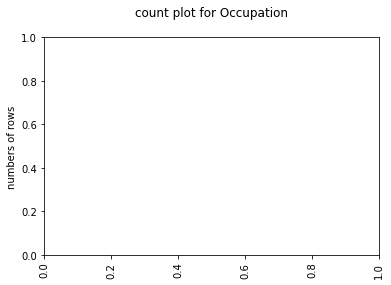

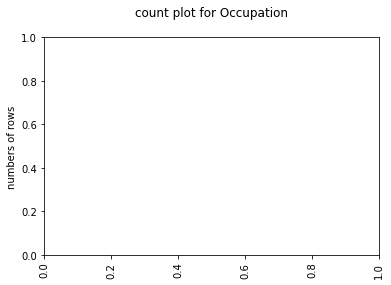

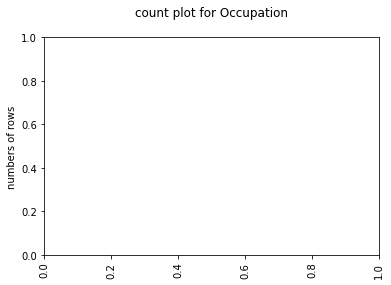

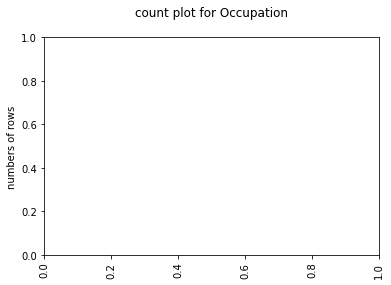

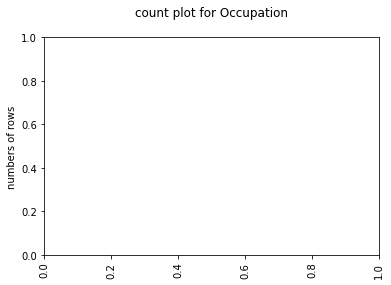

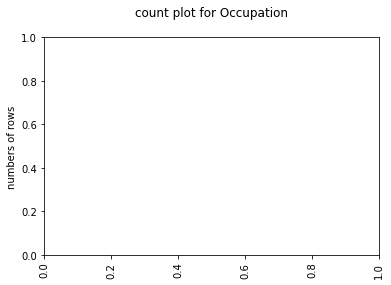

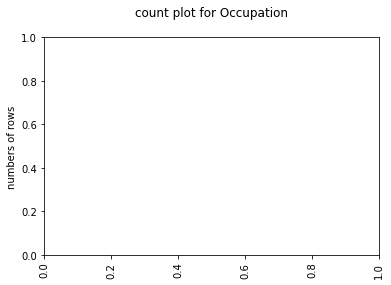

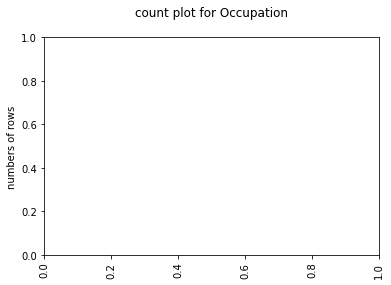

In [28]:
#From the below countplot we can see that occupation column has various categories out of which people in armed forces are the least and folks engaged in some craft repair,executive managers and holding some professional speciality are on the rise


try:
    plt.figure(figsize=(15,7))
    col_name='Occupation'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index+=1
        plt.title(f"count plot for {col_name}\n")
        plt.ylabel(f"numbers of rows")
        plt.xticks(rotation=90)
        plt.show()
except Exception as e:
    print("Error:",e)
    pas

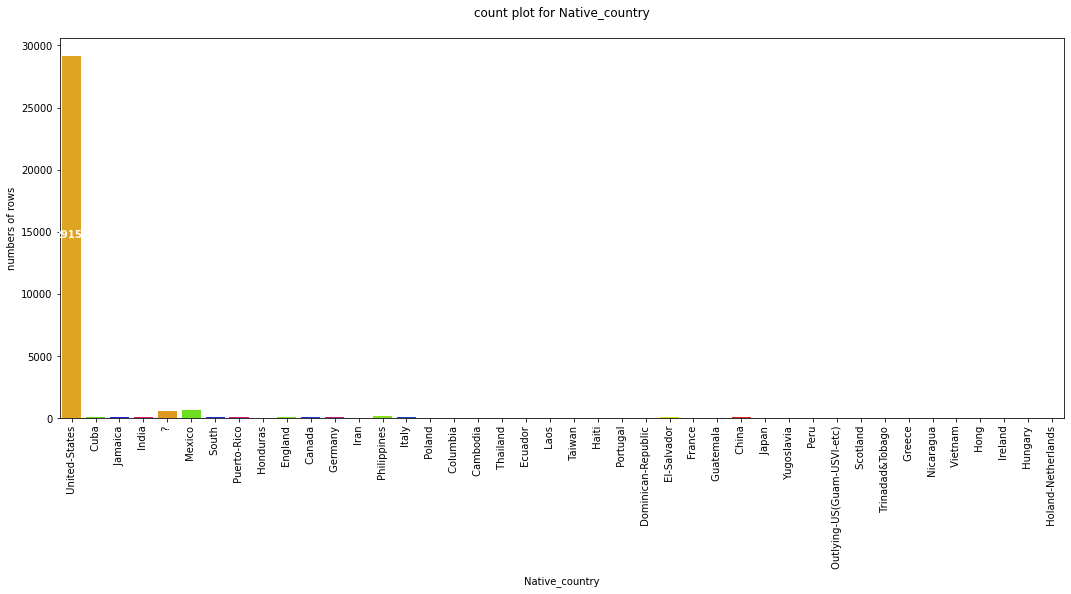

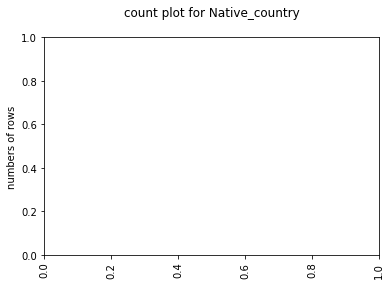

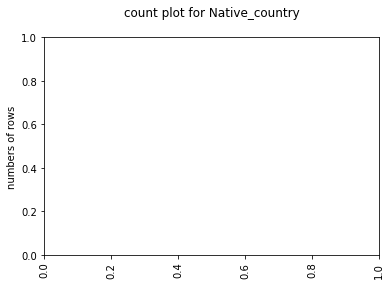

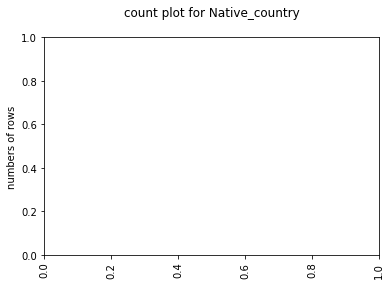

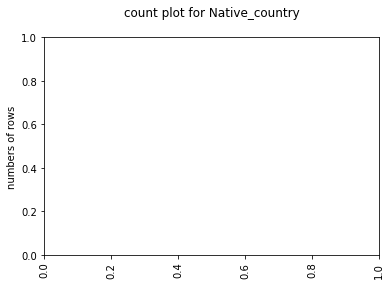

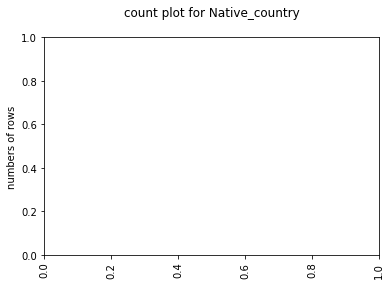

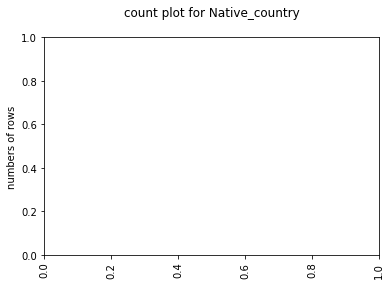

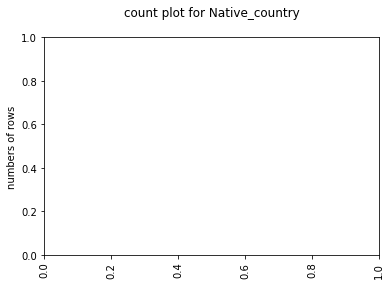

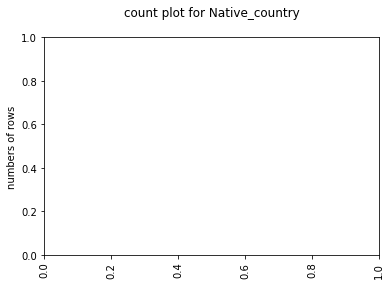

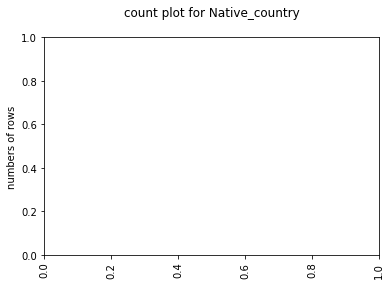

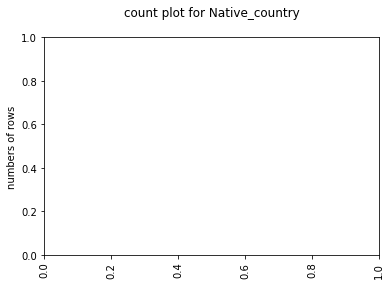

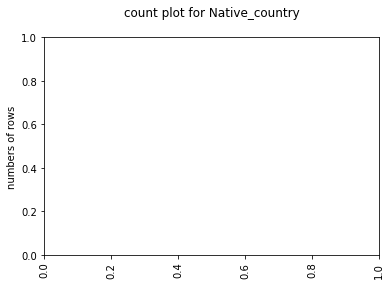

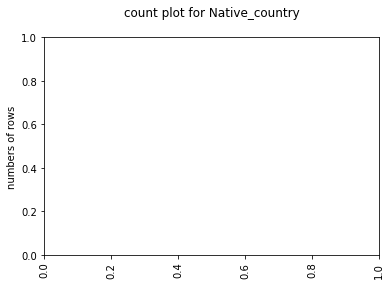

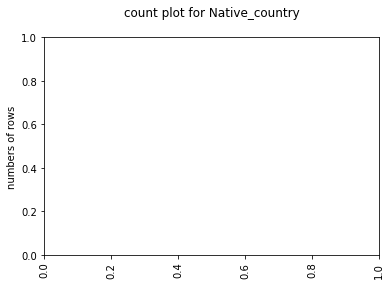

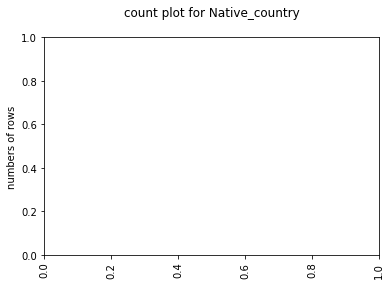

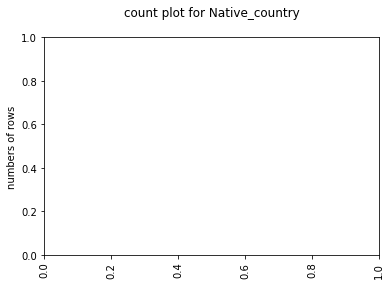

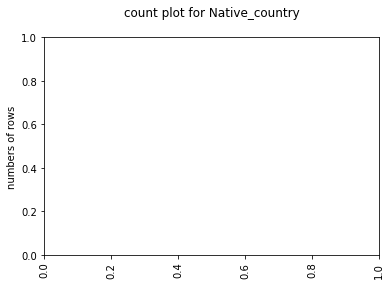

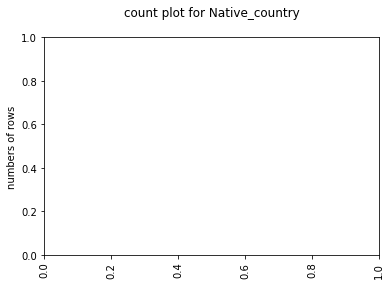

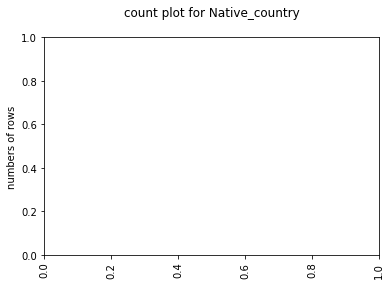

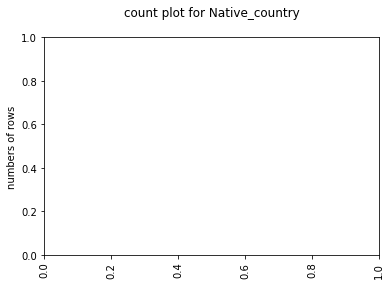

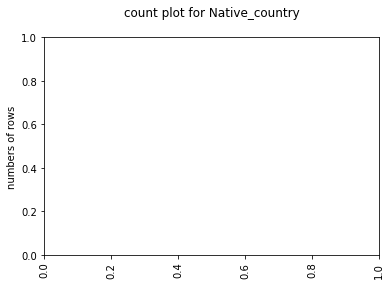

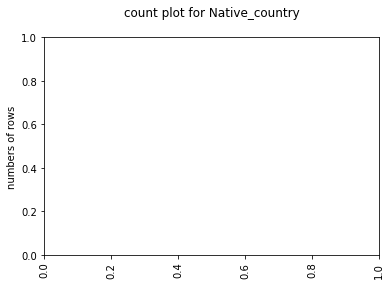

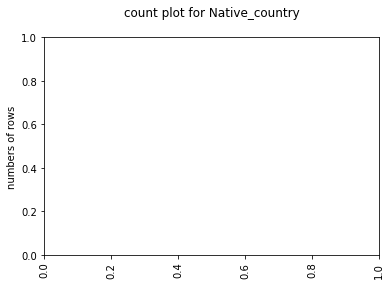

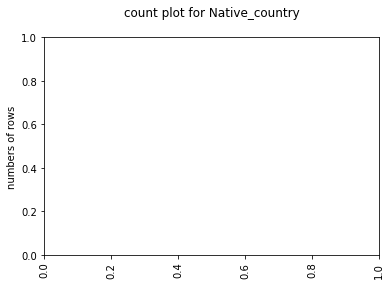

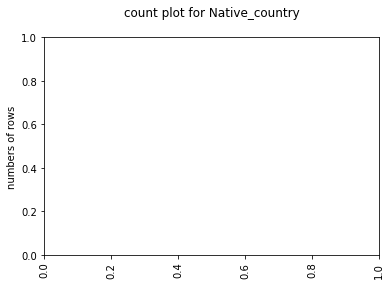

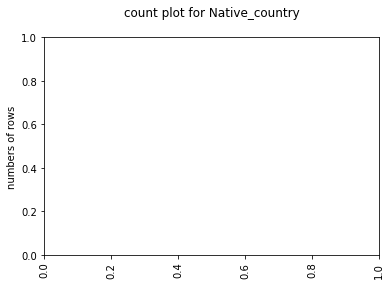

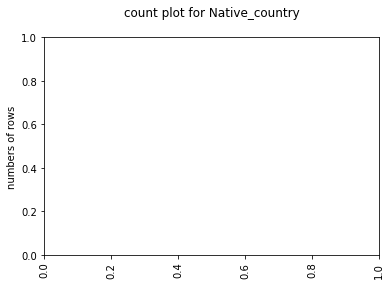

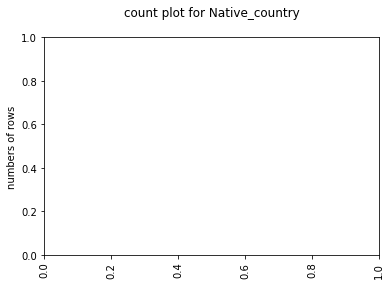

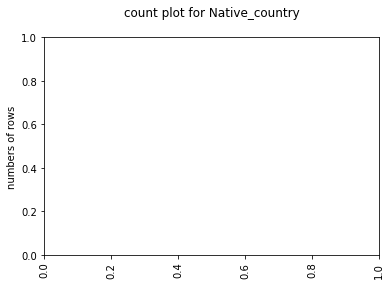

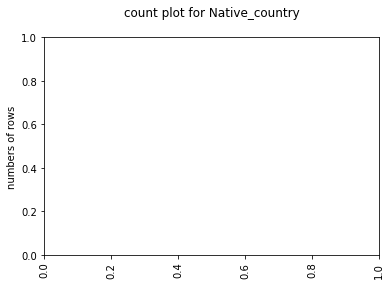

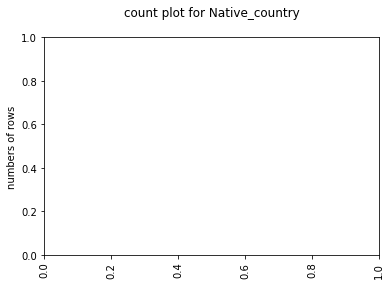

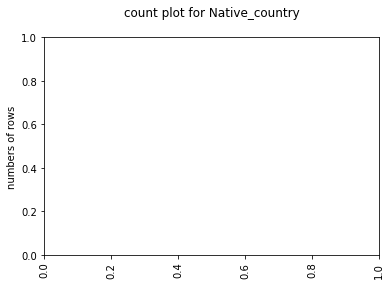

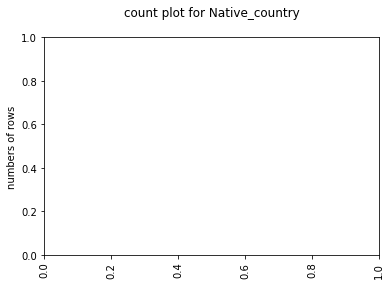

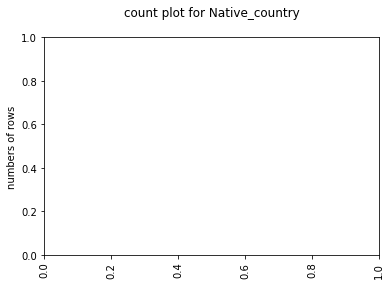

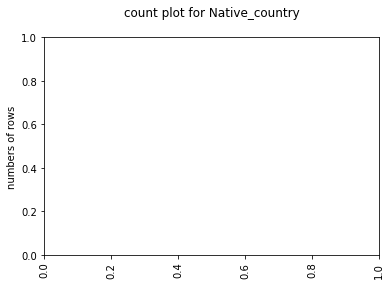

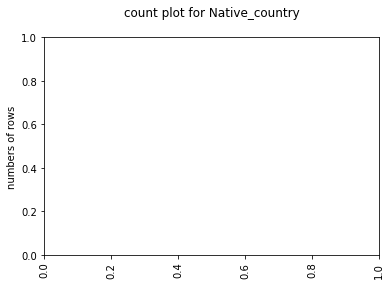

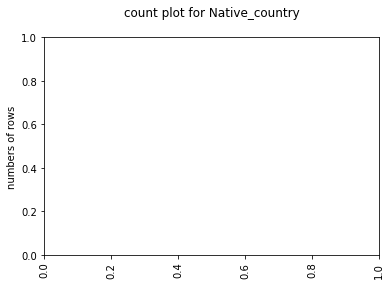

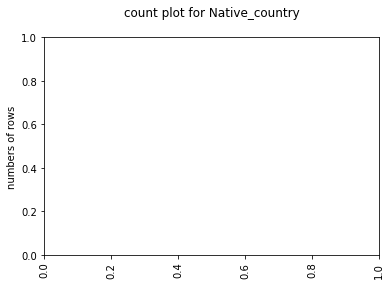

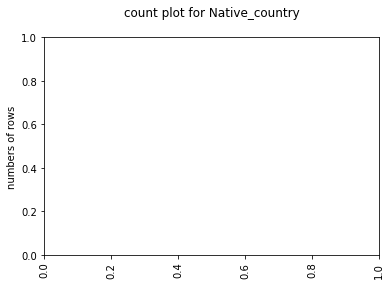

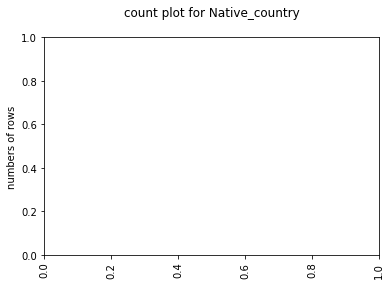

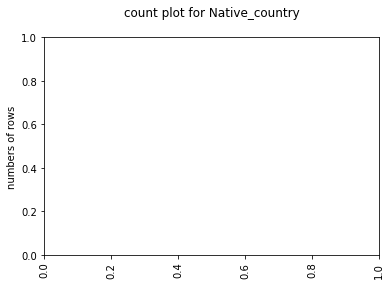

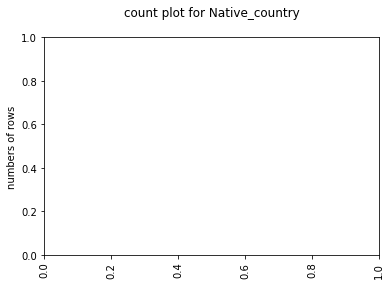

In [29]:
#From the below countplot we can see that the negative country column has the highest value for us followedby mexico and others while the categories has the least to legigible amount of data coverage.
try:
    plt.figure(figsize=(18,7))
    col_name='Native_country'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index +=1
        plt.title(f"count plot for {col_name}\n")
        plt.ylabel(f"numbers of rows")
        plt.xticks(rotation=90)
        plt.show()
        
except Exception as e:
    print("Error:",e)
    pass

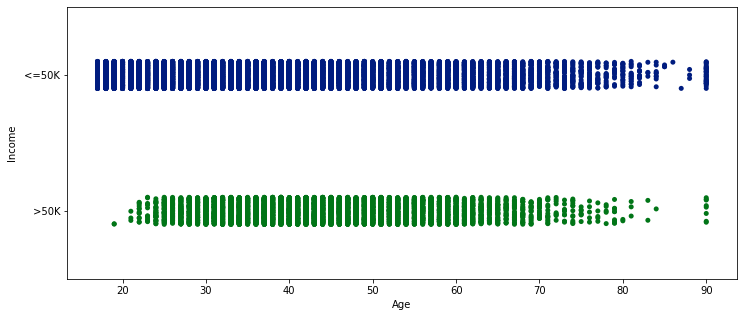

In [30]:
#I n the below strip plot we can see that young people hardly have income more than 50 k.
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x="Age",y='Income',data=df)
plt.show()

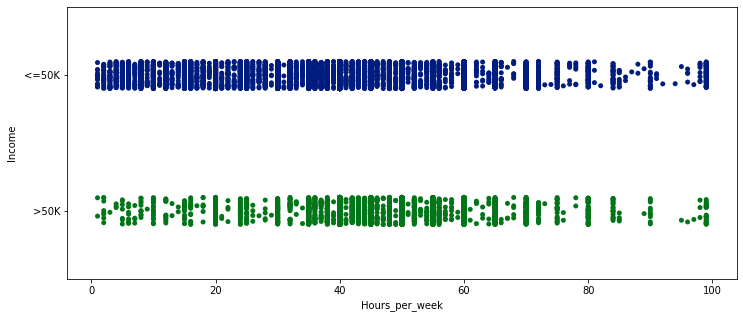

In [31]:
#In the below strip plot we can see that people who have income less than or equal to 50k put in more hours per week as compared to the ones who earn more than 50k as income.
plt.figure(figsize=(12,5))
sns.stripplot(x="Hours_per_week" ,y='Income',data=df)
plt.show()

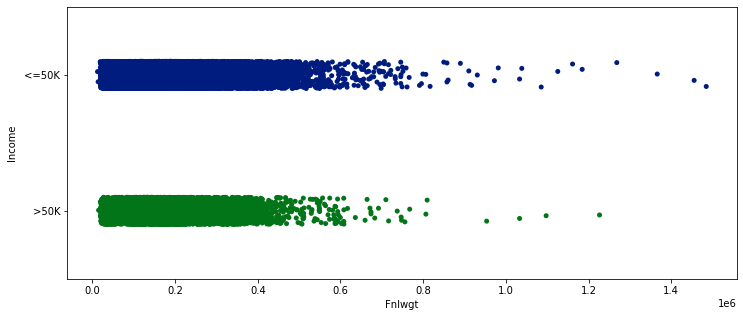

In [32]:
#In the below strip plot we can see that the final weight has data coverage on a higher scale for people in the <=50k incme bracket as compared to the people in >50k income bracket.
plt.figure(figsize=(12,5))
sns.stripplot(x="Fnlwgt" ,y='Income' ,data=df)
plt.show()


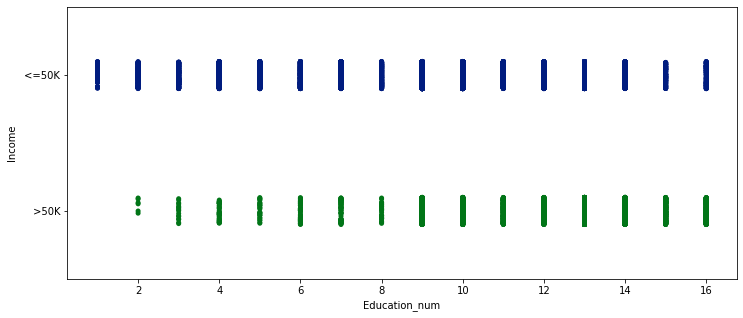

In [33]:
#In the below strip plot we can see that the the lower education number is almost negligible for people with income >50k and it therefore emphasize on the importance of education too.
plt.figure(figsize=(12,5))
sns.stripplot(x="Education_num",y='Income',data=df)
plt.show()

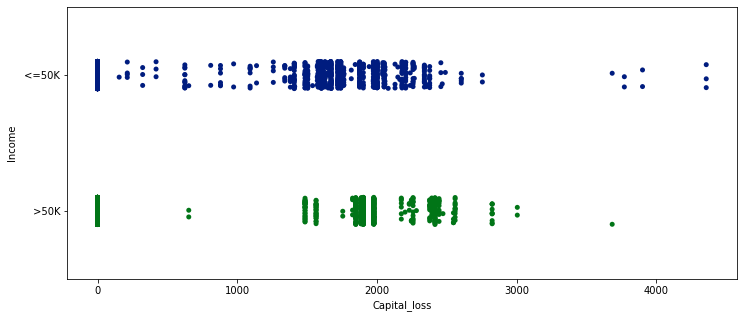

In [34]:
#In the below strip plot we can see that the CAPITAL GAIN IS ON A HIGHER SCALE FOR PEOPLE WITH INCOME >50K.
plt.figure(figsize=(12,5))
sns.stripplot(x="Capital_loss" ,y='Income',data=df)
plt.show()

Text(0, 0.5, 'Percentage of People')

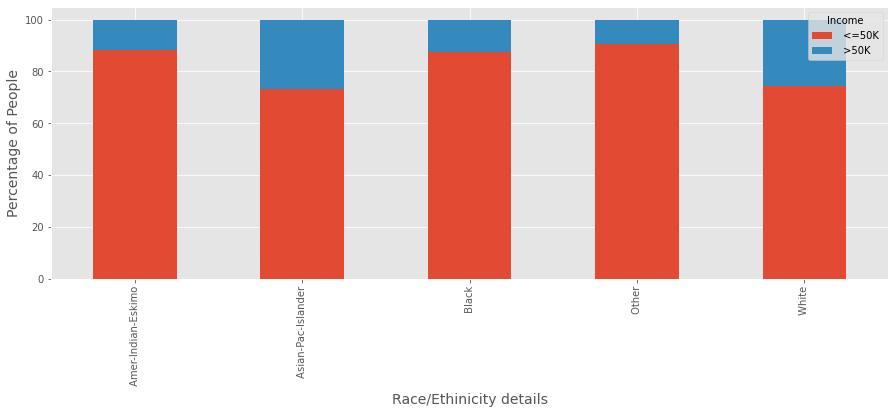

In [35]:
#The below cross tab bar plot show us different ethenicity race group folks and the income variation between them.
plt.style.use('ggplot')
tbl=pd.crosstab(df['Race'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Race/Ethinicity details' ,fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

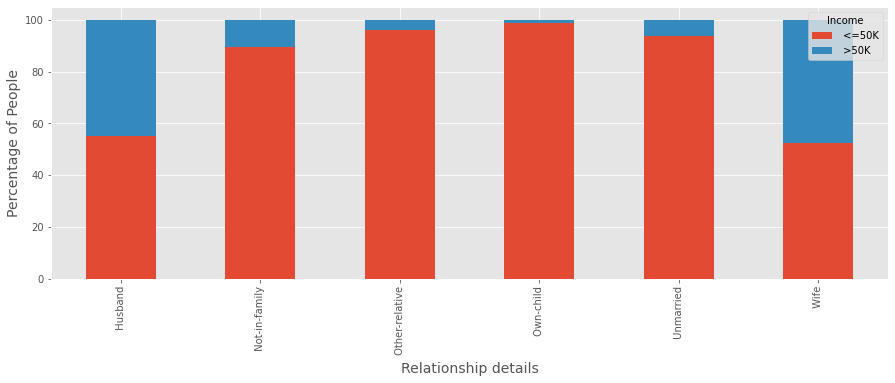

In [36]:
tbl=pd.crosstab(df['Relationship'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Relationship details',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

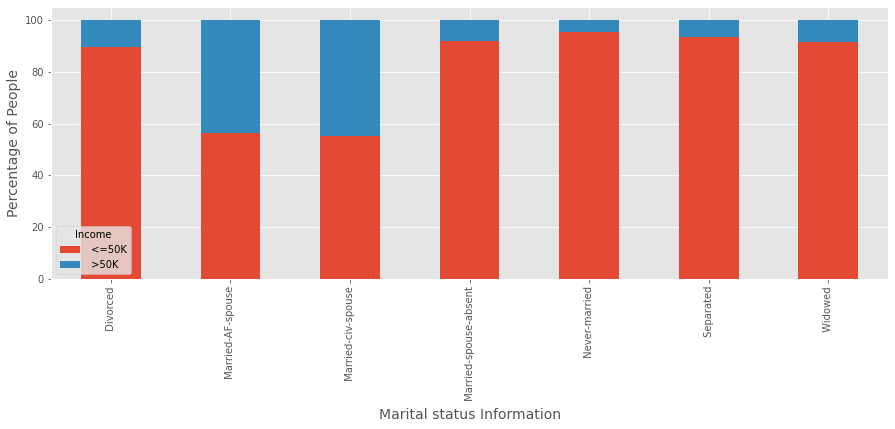

In [37]:
tbl=pd.crosstab(df['Marital_status'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Marital status Information',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

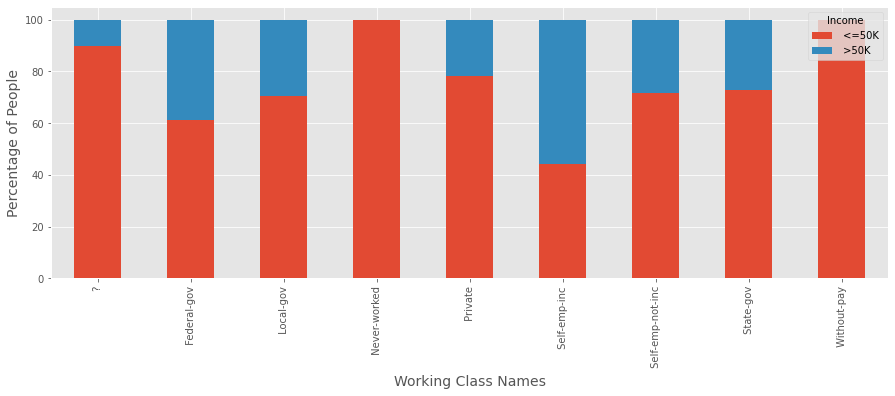

In [38]:
tbl = pd.crosstab(df['Workclass'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Working Class Names',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

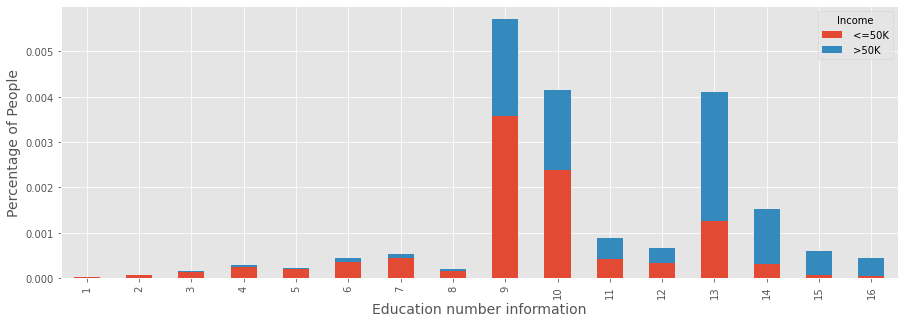

In [39]:
tbl=pd.crosstab(df['Education_num'],df['Income'])
(tbl.div(tbl.sum(axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5)))
plt.xlabel('Education number information',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

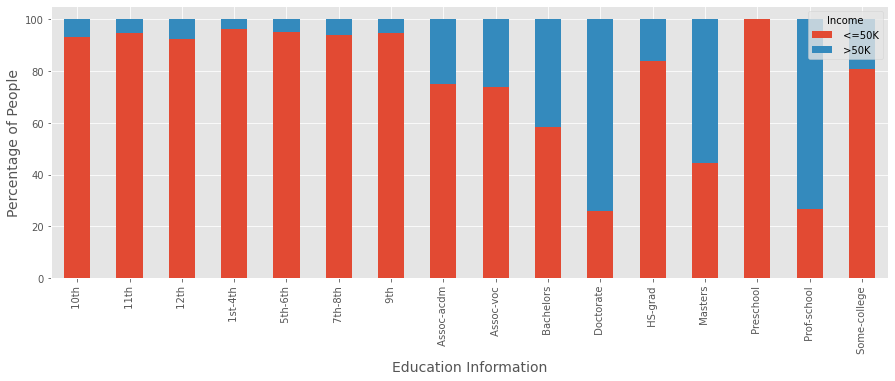

In [40]:
tbl=pd.crosstab(df['Education'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education Information',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

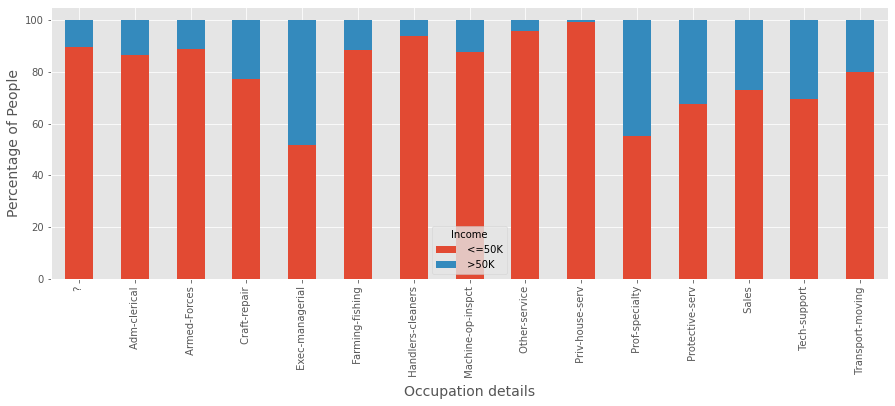

In [41]:
tbl=pd.crosstab(df['Occupation'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Occupation details',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

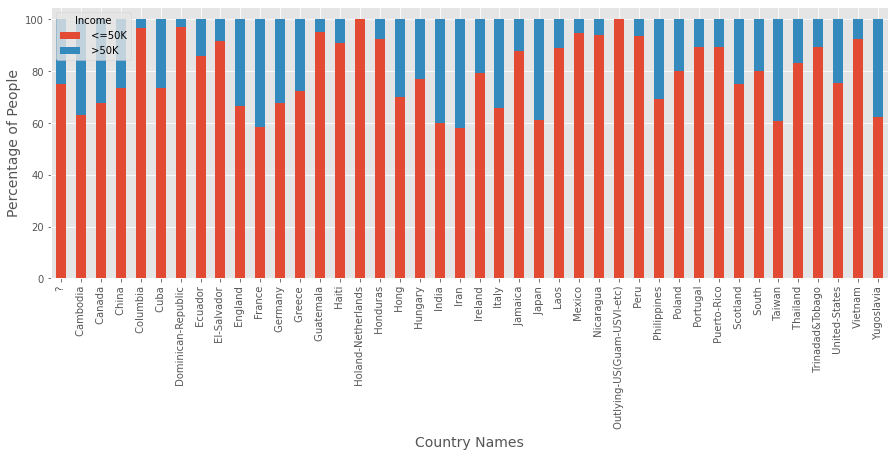

In [42]:
tbl=pd.crosstab(df['Native_country'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Country Names',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

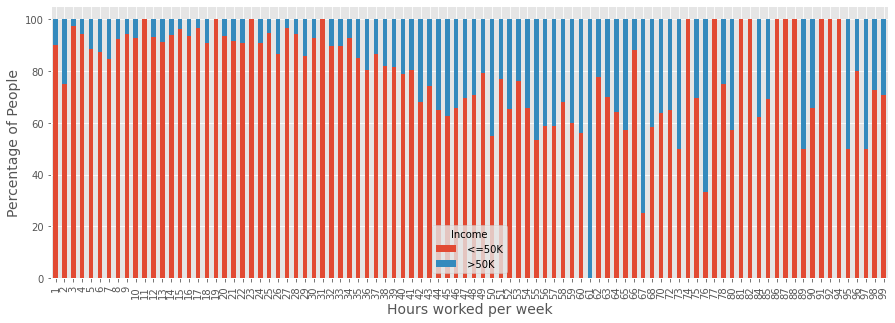

In [43]:
tbl=pd.crosstab(df['Hours_per_week'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Hours worked per week',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

Text(0, 0.5, 'Percentage of People')

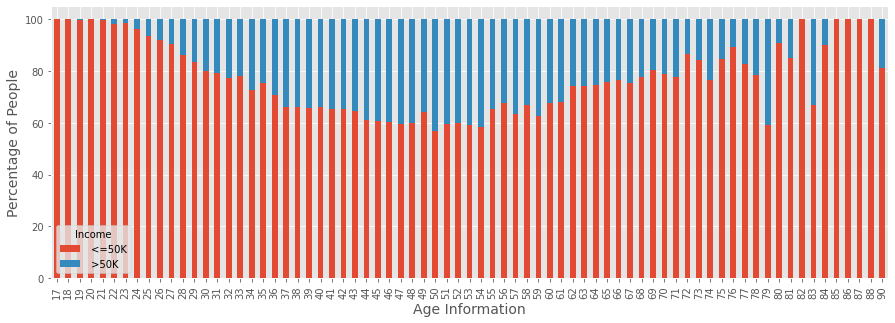

In [44]:
tbl=pd.crosstab(df['Age'],df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Age Information',fontsize=14)
plt.ylabel('Percentage of People',fontsize=14)

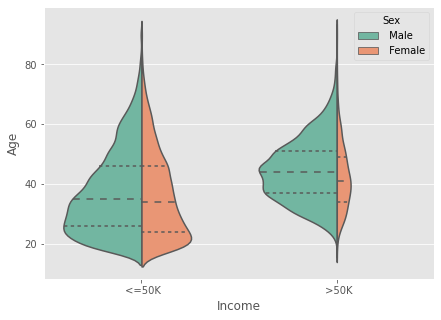

In [45]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income",y="Age",hue="Sex",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.show()

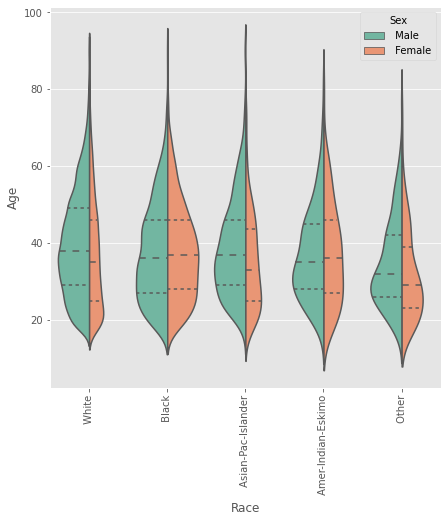

In [46]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race",y="Age",hue="Sex",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.xticks(rotation=90)
plt.show()

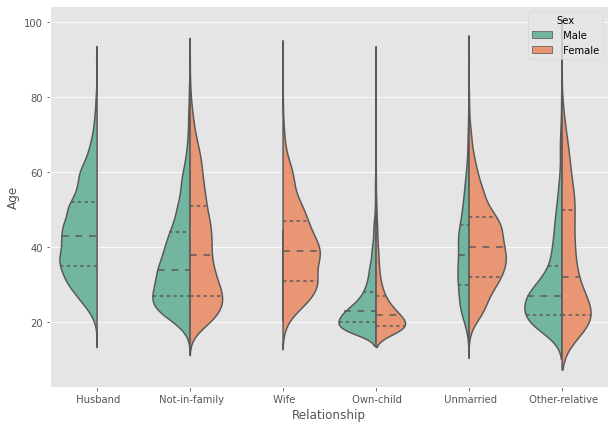

In [47]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Relationship",y="Age",hue="Sex",data=df,
               palette="Set2",split=True,scale="count",inner="quartile")

plt.show()

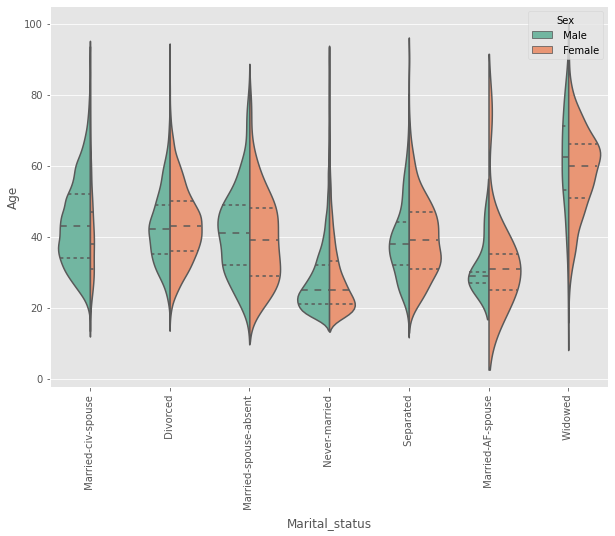

In [48]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Marital_status",y="Age",hue="Sex",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.xticks(rotation=90)
plt.show()

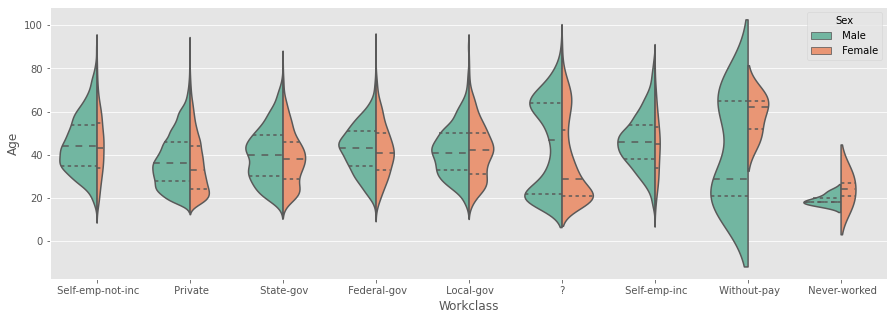

In [49]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass",y="Age",hue="Sex",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")

plt.show()

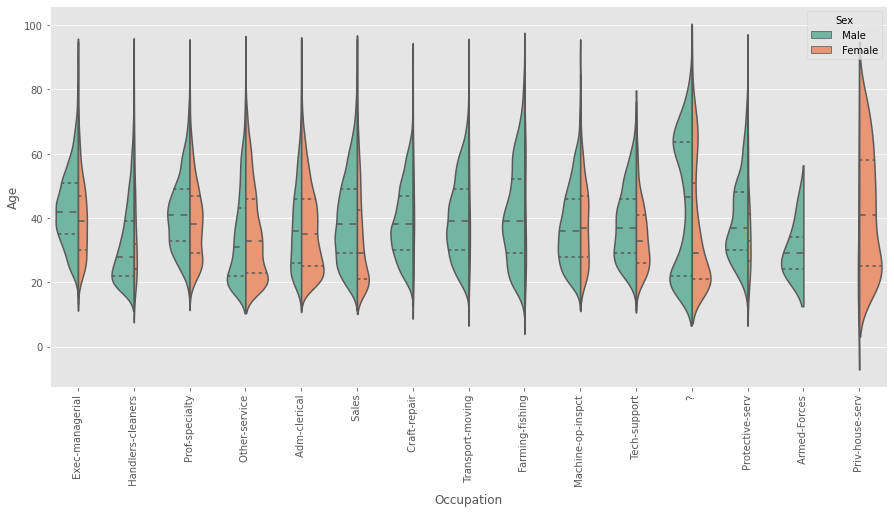

In [50]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation",y="Age",hue="Sex",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.xticks(rotation=90)
plt.show()

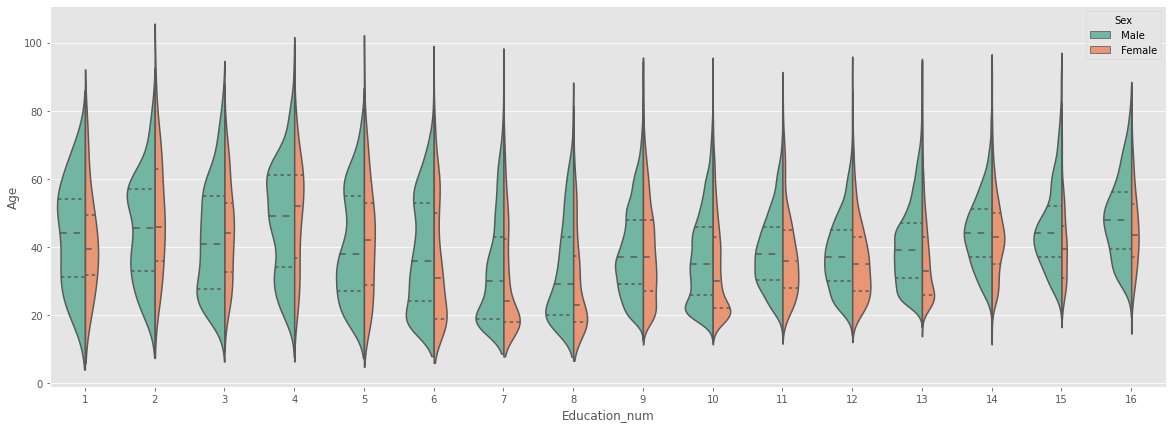

In [51]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num",y="Age",hue="Sex",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")

plt.show()

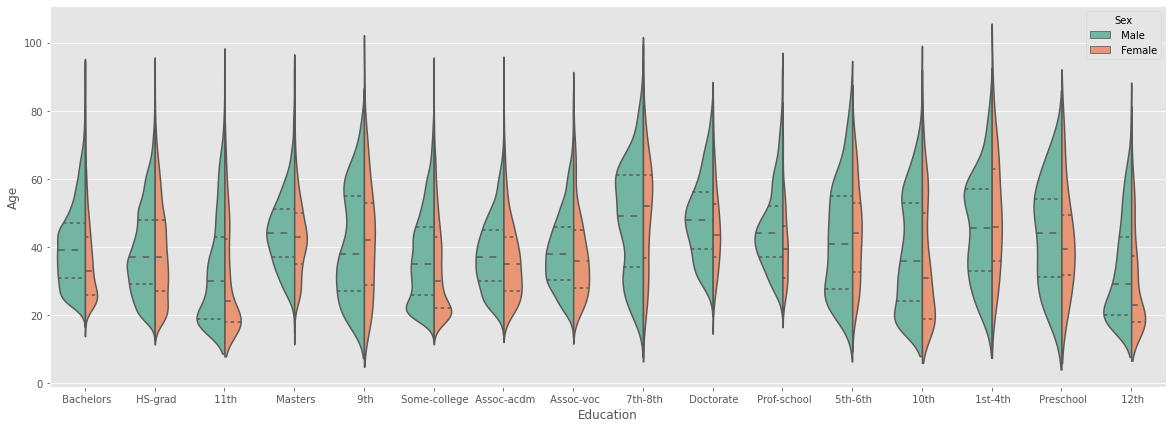

In [52]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education",y="Age",hue="Sex",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.show()

In [53]:
le=LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [54]:
oe=OrdinalEncoder()
df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0


In [55]:
print(f"Shape of our  data frame post encoding is",df.shape)
df.isnull().sum()

Shape of our  data frame post encoding is (32536, 15)


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

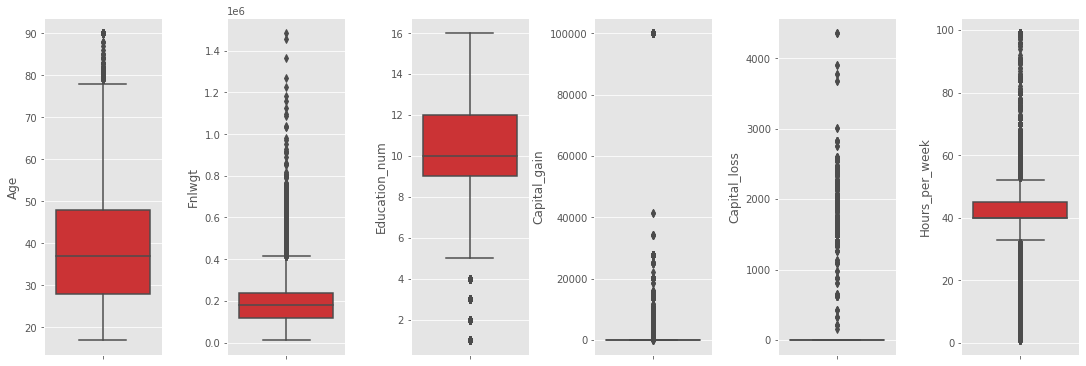

In [56]:
fig,ax=plt.subplots(ncols=6,nrows=1,figsize=(15,5))
index=0
ax=ax.flatten()
for col,value in df[integer_datatype].items():
    sns.boxplot(y=col,data=df,ax=ax[index],palette="Set1")
    index +=1
plt.tight_layout(pad=0.4,w_pad=0.4,h_pad=1.0)
plt.show()

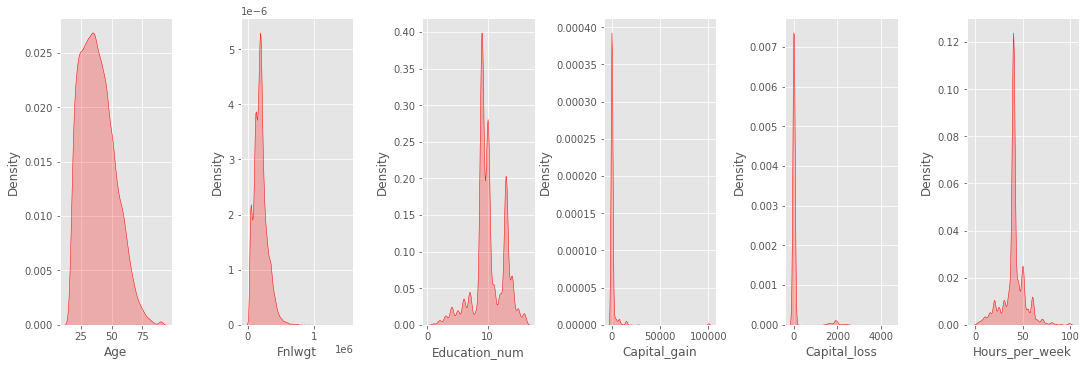

In [57]:
fig,ax=plt.subplots(ncols=6 ,nrows=1,figsize=(15,5))
index=0
ax=ax.flatten()
for col,value in df[integer_datatype].items():
    sns.distplot(value,ax=ax[index],hist=False,color="r",kde_kws={"shade":True})
    index +=1
plt.tight_layout(pad=0.4,w_pad=0.4, h_pad=1.0)
plt.show()
    

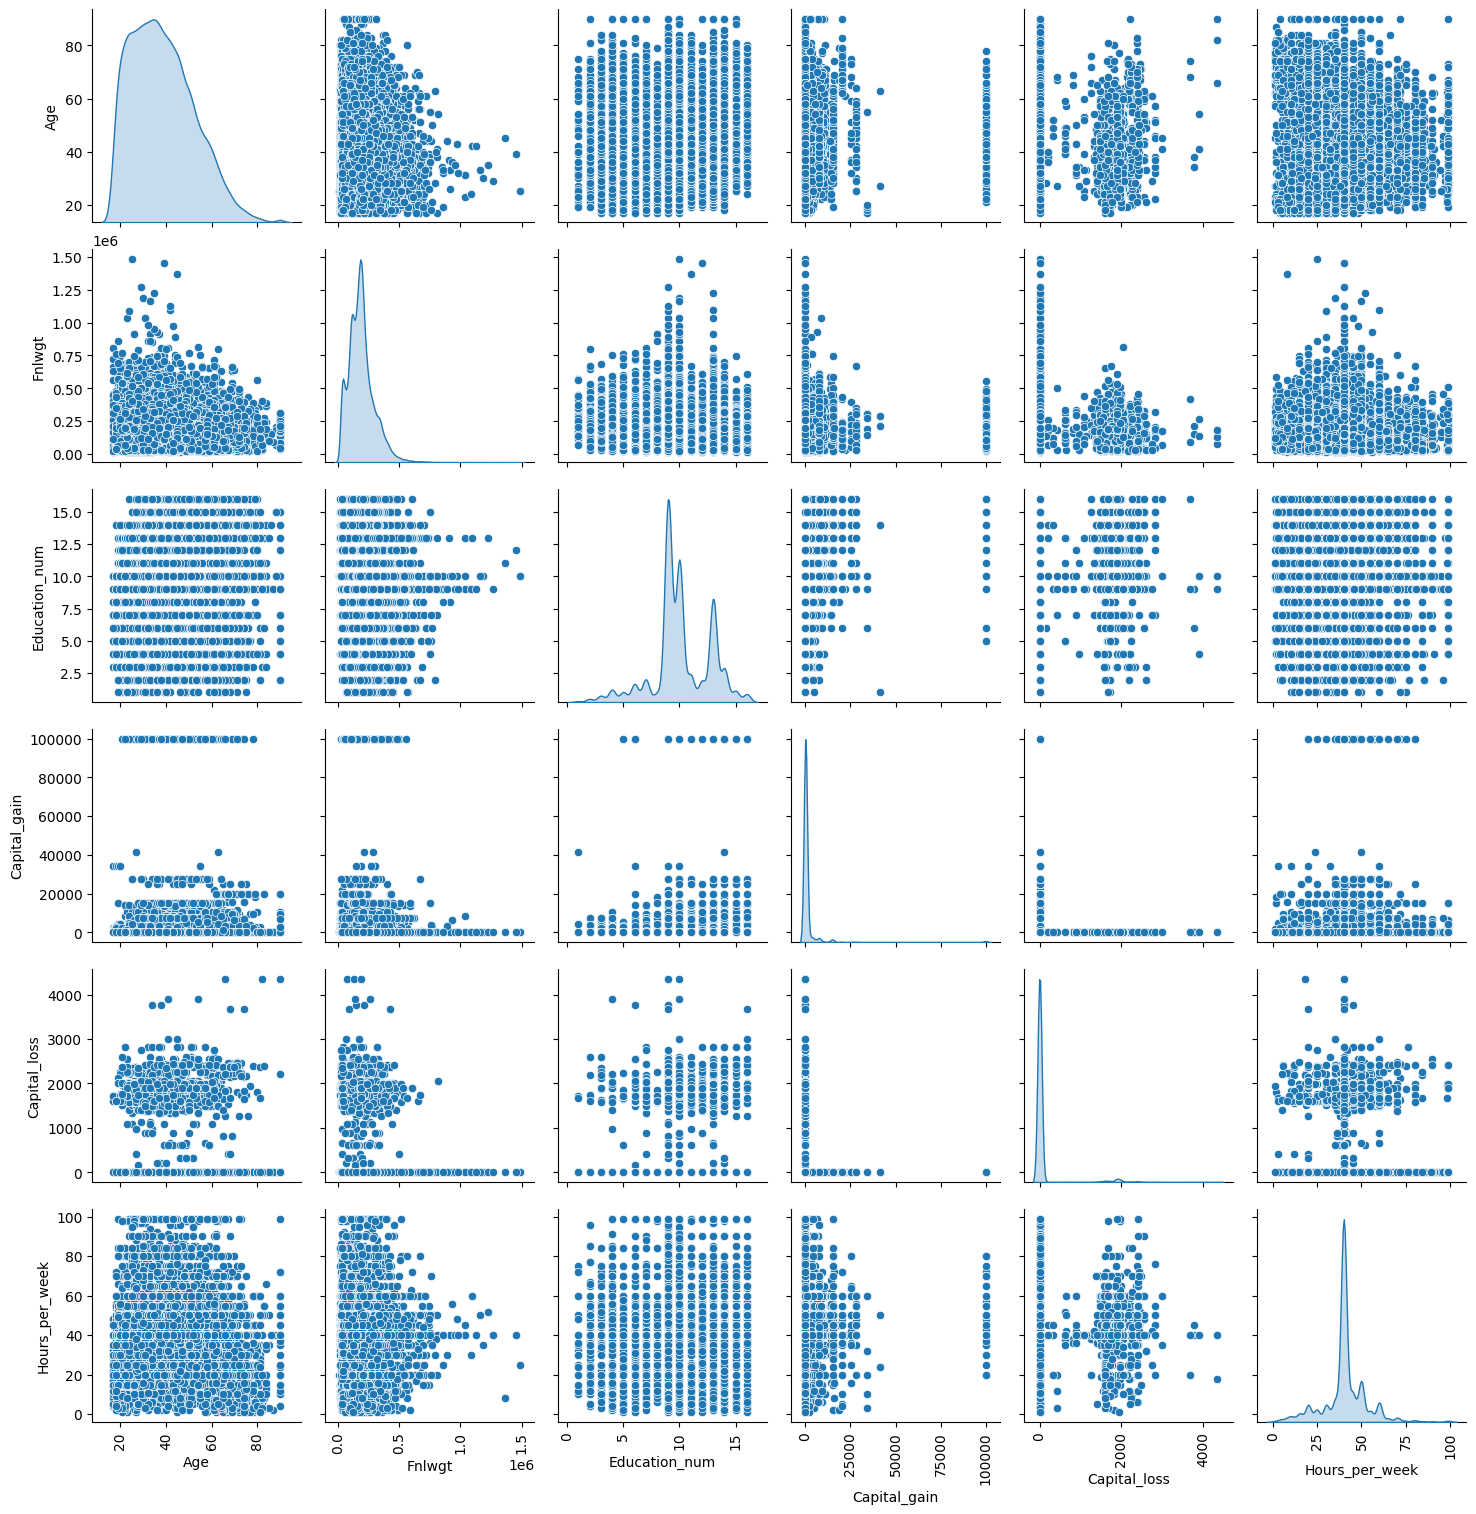

In [58]:
num_values=df.drop(['Workclass','Marital_status','Education','Occupation','Relationship','Race','Sex',
                    'Native_country','Income'],axis=1)
plt.style.use('default')
g=sns.pairplot(num_values,diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x",labelrotation=90)
plt.show()

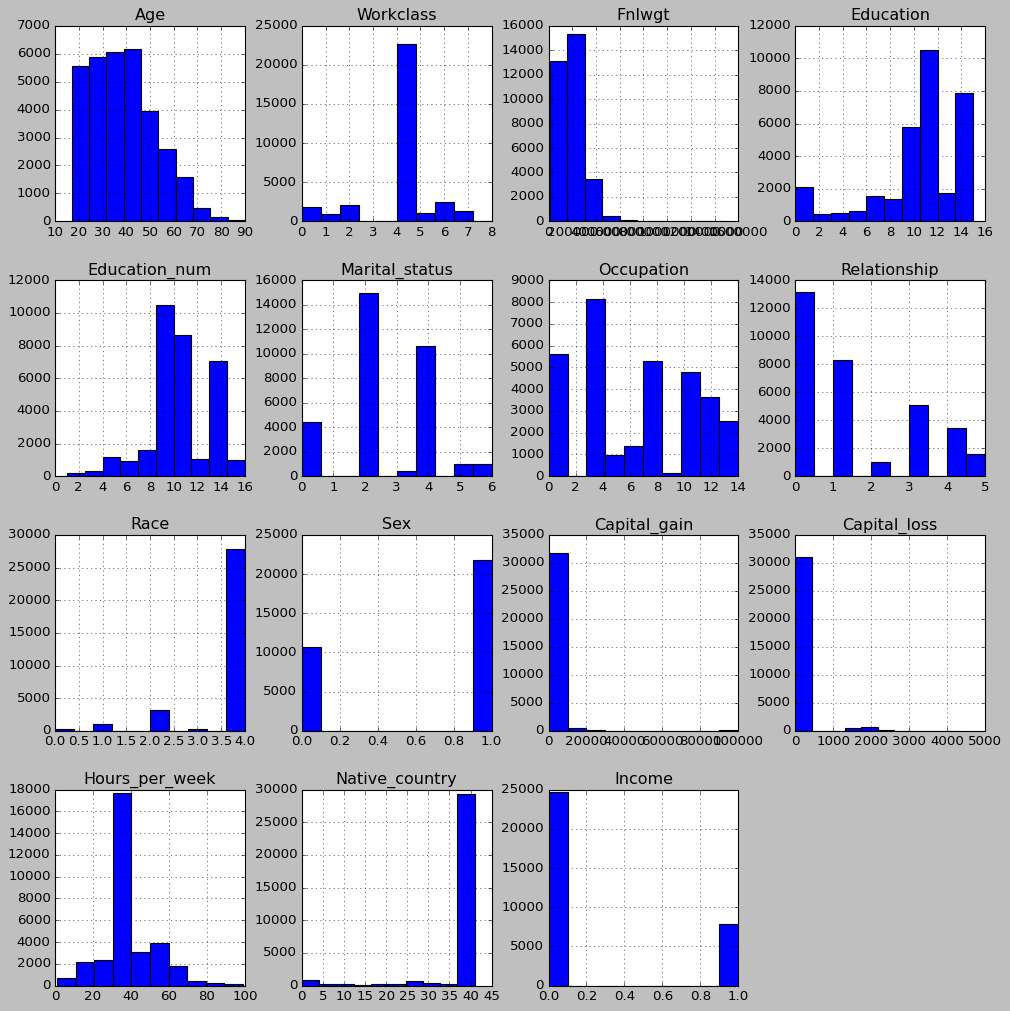

In [59]:
plt.style.use('classic')
df.hist(figsize=(15,15))
plt.show()

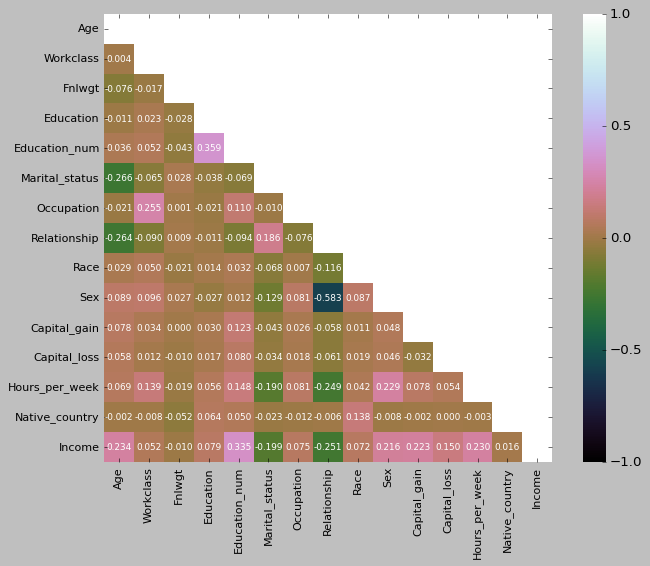

In [60]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,square=True,fmt='0.3f',
            annot_kws={'size':8},cmap="cubehelix",mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


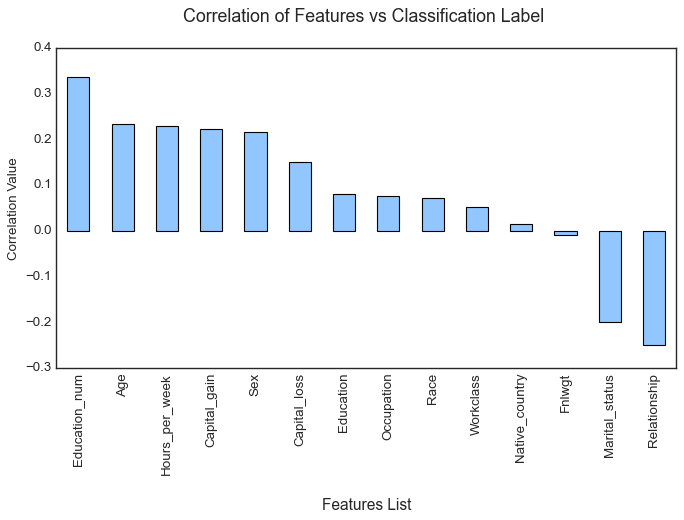

In [61]:
plt.style.use('seaborn-white')
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Classification Label \n",fontsize=16)
plt.xlabel("\nFeatures List",fontsize=14)
plt.ylabel("Correlation Value",fontsize=12)
plt.show()

In [62]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print("Shape of the dataframe before removing outliers",df.shape)
print("Shape of the dataframe before removing outliers",df1.shape)

print("Percentage of data loss post outliers removal",(df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()



Shape of the dataframe before removing outliers (32536, 15)
Shape of the dataframe before removing outliers (27399, 15)
Percentage of data loss post outliers removal 15.788664863535775


In [63]:
df.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt             0.627331
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       4.933077
Capital_loss      29.316076
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

In [64]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [65]:
df.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt            -0.955214
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       3.111491
Capital_loss      24.838742
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

In [66]:
X=df.drop('Income',axis=1)
Y=df['Income']

In [67]:
Y.value_counts()

0    21263
1     6136
Name: Income, dtype: int64

In [68]:
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [69]:
Y.value_counts()

0    21263
1    21263
Name: Income, dtype: int64

In [70]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.777014,1.538678,-1.136718,-0.431384,1.026546,-0.320236,-0.654314,-0.729871,0.307615,0.607489,-0.380413,-0.033603,-2.640378,0.173397
1,-0.171929,0.072418,0.527107,0.136282,-0.630626,-1.853852,-0.176568,-0.108322,0.307615,0.607489,-0.380413,-0.033603,-0.146562,0.173397
2,1.014249,0.072418,0.675389,-2.702048,-1.459212,-0.320236,-0.176568,-0.729871,-3.493859,0.607489,-0.380413,-0.033603,-0.146562,0.173397
3,-0.251007,0.072418,1.012376,0.420115,1.440839,-0.320236,-0.654314,2.377871,0.307615,-1.691696,-0.380413,-0.033603,-0.146562,0.173397
4,0.697935,0.072418,0.007001,-1.282883,-2.287799,0.446571,0.301179,-0.108322,-3.493859,-1.691696,-0.380413,-0.033603,-2.363288,-6.267946


In [71]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)

Best accuracy score is 77.37960872836719 on Random State 847


,Importance
Features,
Relationship,0.189
Age,0.134
Marital_status,0.131
Fnlwgt,0.122
Occupation,0.074
Hours_per_week,0.070
Education_num,0.069
Capital_gain,0.060
Education,0.050


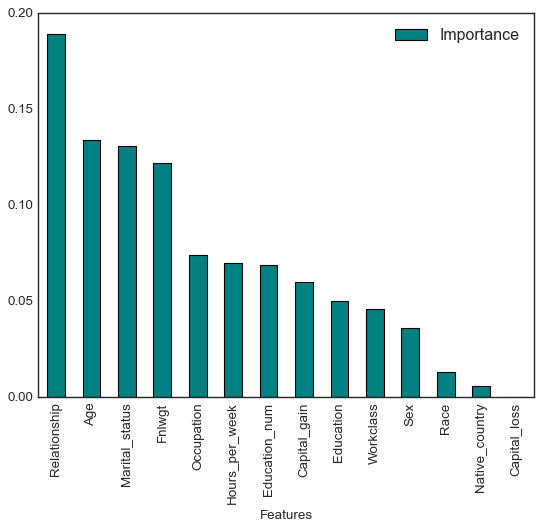

In [72]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
importances = pd.DataFrame({'Features':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

In [73]:
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=498)
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    class_report=classification_report(Y_test,pred)
    print("\nClassification  Report:\n",class_report)
    acc_score=(accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    result=acc_score-cv_score
    print("\nAccuracy Score-Cross Validation Score is",result)

In [74]:
#Logistic Regression
model=LogisticRegression()
classify(model,X,Y)


Classification  Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      5311
           1       0.76      0.78      0.77      5321

    accuracy                           0.77     10632
   macro avg       0.77      0.77      0.77     10632
weighted avg       0.77      0.77      0.77     10632

Accuracy Score: 76.68359668924003
Cross Validation Score: 76.53672277258242

Accuracy Score-Cross Validation Score is 0.1468739166576114


In [75]:
#support vector classifier
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)


Classification  Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      5311
           1       0.81      0.91      0.86      5321

    accuracy                           0.85     10632
   macro avg       0.85      0.85      0.85     10632
weighted avg       0.85      0.85      0.85     10632

Accuracy Score: 84.78179082016554
Cross Validation Score: 84.00984193057764

Accuracy Score-Cross Validation Score is 0.7719488895879039


In [76]:
#DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)


Classification  Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      5311
           1       0.84      0.91      0.87      5321

    accuracy                           0.87     10632
   macro avg       0.87      0.87      0.87     10632
weighted avg       0.87      0.87      0.87     10632

Accuracy Score: 86.54063205417607
Cross Validation Score: 86.17095156954603

Accuracy Score-Cross Validation Score is 0.3696804846300381


In [77]:
#RandomForestClassifier

model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)


Classification  Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      5311
           1       0.85      0.93      0.89      5321

    accuracy                           0.88     10632
   macro avg       0.89      0.88      0.88     10632
weighted avg       0.89      0.88      0.88     10632

Accuracy Score: 88.48758465011286
Cross Validation Score: 87.90872383473685

Accuracy Score-Cross Validation Score is 0.578860815376018


In [78]:
#KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)


Classification  Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      5311
           1       0.81      0.90      0.85      5321

    accuracy                           0.84     10632
   macro avg       0.84      0.84      0.84     10632
weighted avg       0.84      0.84      0.84     10632

Accuracy Score: 84.05756207674943
Cross Validation Score: 83.7676300838513

Accuracy Score-Cross Validation Score is 0.28993199289813276


In [79]:
#ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,Y)


Classification  Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5311
           1       0.89      0.92      0.90      5321

    accuracy                           0.90     10632
   macro avg       0.90      0.90      0.90     10632
weighted avg       0.90      0.90      0.90     10632

Accuracy Score: 90.14296463506396
Cross Validation Score: 90.20614061824188

Accuracy Score-Cross Validation Score is -0.06317598317791351


In [80]:
##XGB Classifier
model=xgb.XGBClassifier(verbosity=0)
classify(model,X,Y)


Classification  Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5311
           1       0.89      0.91      0.90      5321

    accuracy                           0.90     10632
   macro avg       0.90      0.90      0.90     10632
weighted avg       0.90      0.90      0.90     10632

Accuracy Score: 89.86079759217456
Cross Validation Score: 88.78121678607609

Accuracy Score-Cross Validation Score is 1.0795808060984768


In [81]:

fmod_param={'criterion':['gini','entropy'],
            'n_jobs':[-2,-1,1],
            'random_state':[42,498,1000],
            'max_depth':[0,15,30],
            'n_estimators':[100,200,300]
           }

In [82]:
GSCV=GridSearchCV(ExtraTreesClassifier(),fmod_param,cv=5)

In [83]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 498, 1000]})

In [84]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 42}

In [85]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 42}

In [86]:
Final_Model=ExtraTreesClassifier(criterion='entropy',max_depth=15,n_estimators=100,n_jobs=-2,random_state=42)
Classifier=Final_Model.fit(X_train,Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_acc=(accuracy_score(Y_test,fmod_pred))*100
print("Accuracy score for the Best Model is:",fmod_acc)

Accuracy score for the Best Model is: 85.55304740406321


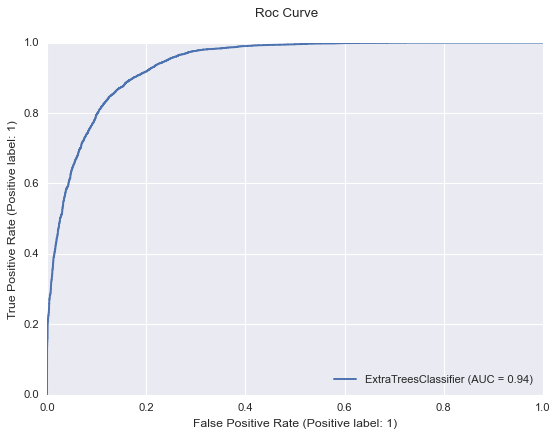

In [87]:
#I have generated the roc curve for my final model and its shows the auc score for my model to be 94%
plt.style.use('seaborn')
disp=metrics.plot_roc_curve(Final_Model,X_test,Y_test)
disp.figure_.suptitle("Roc Curve")
plt.show()

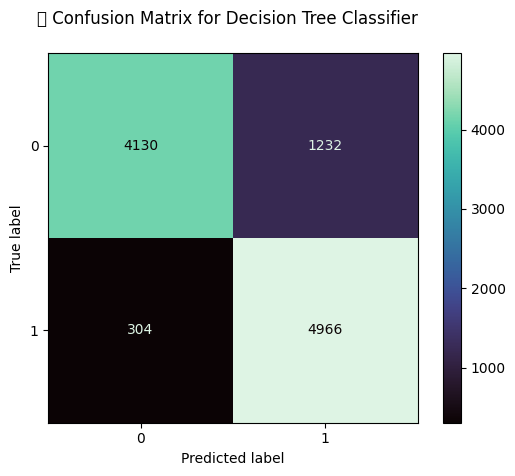

In [91]:
#With the help of confusion matrix i am able to understand the numbers of times i got the correct outputs .
plt.style.use('default')
class_names=df.columns
metrics.plot_confusion_matrix(Classifier,X_test,Y_test,cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier  \n')
plt.show()

In [90]:
filename = "FinalModel_E05.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E05.pkl']